# This script demonstrates ___Computation of Image Features using Convolution___

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github: https://github.com/Eun0/Assignment

# Outline:

### 1. Make image smoothly by using smoothing kernel
### 2. Compute image's gradient and show
### 3. Make image sharply by using sharpening kernel

# import packages for load image and showing image and  manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters as fi
from scipy import signal
from skimage import io, color
from skimage import exposure

# Load image and Make variables for color one and gray one :

In [2]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

# each R,G,B to 2D array 
im_color_r=im_color[:,:,0]
im_color_g=im_color[:,:,1]
im_color_b=im_color[:,:,2]

# Show color and gray image :

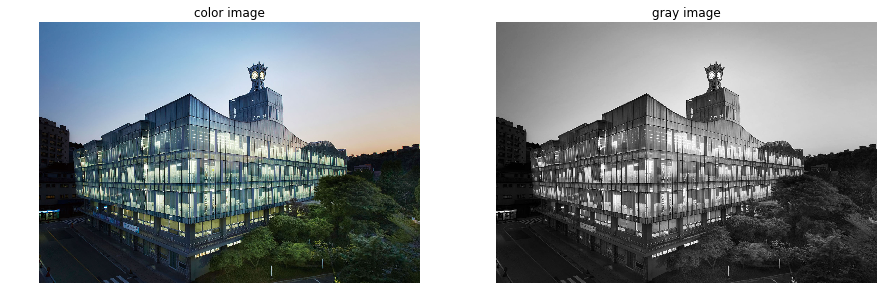

In [3]:
plt.figure(figsize=(15, 15))

p1=plt.subplot(1,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2=plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray,cmap='gray')
plt.axis('off')
plt.show()

# Define gauss_ker(len,sig) function :

it returns 2D smoothing kernel

In [4]:
def gauss_ker(len=21, sig=3):
    # Returns a 2D (Gaussian) Smoothing kernel array.

    # Create len x len zeros
    arr = np.zeros((len, len))
    # Set element at the middle to one, a dirac delta
    arr[len//2, len//2] = 1
    # Gaussian-smooth the dirac, resulting in a gaussian filter mask
    return fi.gaussian_filter(arr, sig)

# Make smoothing kernel :

In [5]:
smooth_ker=gauss_ker()

# Show smoothing kernel :

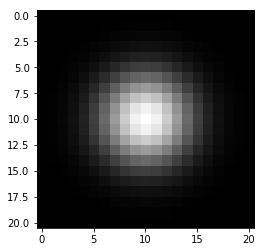

In [6]:
plt.imshow(smooth_ker,cmap='gray')
plt.show()

# Compute convolution with smoothing kernel :

In [7]:
# Compute convolution(each R,G,B) with smoothing kernel
im_smconv_r=signal.convolve2d(im_color_r,smooth_ker,boundary='symm',mode='same')
im_smconv_g=signal.convolve2d(im_color_g,smooth_ker,boundary='symm',mode='same')
im_smconv_b=signal.convolve2d(im_color_b,smooth_ker,boundary='symm',mode='same')

# Compute convolution(gray)
im_smconv = signal.convolve2d(im_gray, smooth_ker, boundary='symm', mode='same')

# Show result image with smoothing kernel :

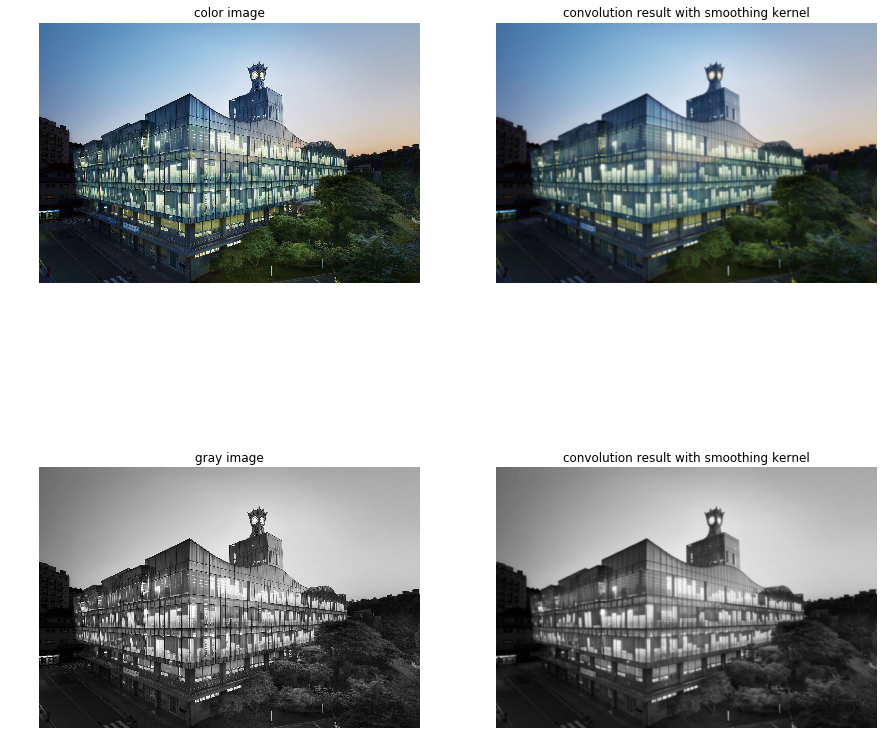

In [8]:
# Combine R,G,B to show image

im=np.empty((1347,1968,3),dtype=int)
im[:,:,0]=im_smconv_r
im[:,:,1]=im_smconv_g
im[:,:,2]=im_smconv_b

plt.figure(figsize=(15, 15))


p1=plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')


p2=plt.subplot(2,2,2)
p2.set_title('convolution result with smoothing kernel')
plt.imshow(im)
plt.axis('off')

p3=plt.subplot(2,2,3)
p3.set_title('gray image')
plt.imshow(im_gray,cmap='gray')
plt.axis('off')

p4=plt.subplot(2,2,4)
p4.set_title('convolution result with smoothing kernel')
plt.imshow(im_smconv,cmap='gray')
plt.axis('off')


plt.show()


# Define normalize(arr) :

normalize the values of the input 2D-array data to be [0, 1]

In [9]:
def normalize(arr):
    
    min_arr=np.full((arr.shape[0],arr.shape[1]),arr.min())

    arr_normalized = (arr - min_arr) / (arr.max() - arr.min())

    return arr_normalized

# Define getMagnitude(gx,gy) :

Compute the magnitude of the gradient

magnitude = $\sqrt{G_x^2+G_y^2}$

In [10]:
def getMagnitude(gx,gy):
    
    return np.sqrt(gx*gx+gy*gy)

# Define getDirection(gx,gy) :

Compute the direction of the gradient

$\theta=\arctan(\frac{G_y}{G_x})$ 

and if the value of $G_x$ is zero, set the value 0.01 as epsilon

In [11]:
def getDirection(gx,gy):
    
    directions=np.ones((gx.shape[0],gx.shape[1]))
    gx[gx==0]=0.01
    directions=np.arctan2(gy, gx) * 180 / np.pi
    
    return directions

# Definition of derivative in x-direction and y-direction

we know that if f(x,y) is continuous and differentiable ftn,

its derivative of x is below

$\frac{\partial f}{\partial x}= \lim_{h\rightarrow 0}\frac{f(x+h,y)-f(x-h,y)}{2h}$

In our case, which f(i,j) is discrete

its derivative of x-direction below

$\frac{\partial f}{\partial (x-dir)}= f_{x-dir}(j)=\frac{f(i,j+1)-f(i,j-1)}{2}$

we can get the value by convolution with [-1,0,1] filter which we call as x-derivatvie

now we can compute the derivative in x-direction like below

$A$ : image array

$G_x$ = $\frac{1}{2} \begin{bmatrix}
-1 & 0 & 1 
\end{bmatrix}$ * $A$


By the same way, we can compute the derivative in y-direction

$G_y$ = $\frac{1}{2} \begin{bmatrix}
-1 \\
0 \\
1 
\end{bmatrix}$ * $A$



# Define convolution kernel for computing the derivative in x-direction :




Now we call the kernel as 

$ ker(G_x)$ = $\frac{1}{2} \begin{bmatrix}
-1 & 0 & 1 
\end{bmatrix}$


In [12]:
gx_ker=np.array([[-1,0,1]])/2

# Show $G_x$ kernel

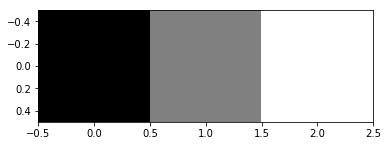

In [13]:
plt.imshow(gx_ker,cmap='gray')
plt.show()

# Compute convolution with $G_x$ kernel and Normalize the result :

In [14]:
# Compute convolution
im_gx = signal.convolve2d(im_gray, gx_ker, boundary='symm', mode='same')

# Normalize the result
im_gx_normed=normalize(im_gx)

# Define convolution kernel for computing the derivative in y-direction :

Now we call the kernel as 

$ ker(G_y)$ = $\frac{1}{2} \begin{bmatrix}
-1 \\
0 \\
1 
\end{bmatrix}$ 

In [15]:
gy_ker=np.array([[-1],[0],[1]])/2

# Show $G_y$ kernel

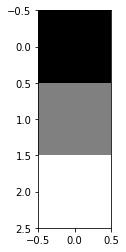

In [16]:
plt.imshow(gy_ker,cmap='gray')

plt.show()

# Compute convolution with $G_y$ kernel and Normalize the result :

In [17]:
# Compute convolution
im_gy = signal.convolve2d(im_gray, gy_ker, boundary='symm', mode='same')

# Normalize the result
im_gy_normed=normalize(im_gy)

# Show result image with $G_x$ kernel and  $G_y$ kernel :

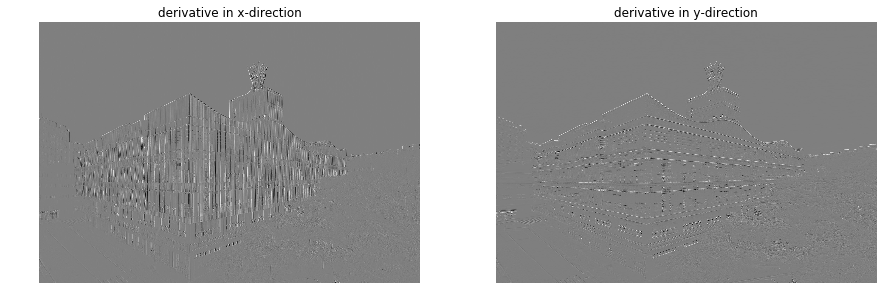

In [18]:
plt.figure(figsize=(15, 15))

p1=plt.subplot(1,2,1)
p1.set_title('derivative in x-direction')
plt.imshow(im_gx_normed,cmap='gray')
plt.axis('off')

p2=plt.subplot(1,2,2)
p2.set_title('derivative in y-direction')
plt.imshow(im_gy_normed,cmap='gray')
plt.axis('off')

plt.show()


# Compute absolute value of gradient :

In [19]:
# Compute absolute value
gx_abs=np.absolute(im_gx)
gy_abs=np.absolute(im_gy)

#Normalize the result
gx_abs_normed=normalize(gx_abs)
gy_abs_normed=normalize(gy_abs)

# Show absolute value of gradient :

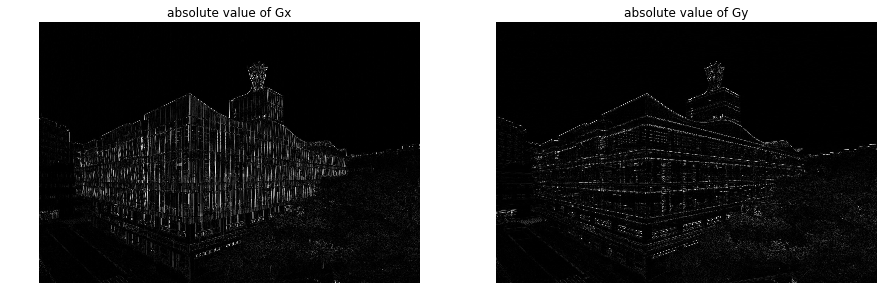

In [20]:
plt.figure(figsize=(15, 15))

p1=plt.subplot(1,2,1)
p1.set_title('absolute value of Gx')
plt.imshow(gx_abs_normed,cmap='gray')
plt.axis('off')

p2=plt.subplot(1,2,2)
p2.set_title('absolute value of Gy')
plt.imshow(gy_abs_normed,cmap='gray')
plt.axis('off')

plt.show()


# Compute magnitude of gradient and Normalize the result :

In [21]:
# Compute magnitude of gradient
magnitudes=getMagnitude(im_gx,im_gy)

# Normalize the result
magnitudes_normed=normalize(magnitudes)

# Compute direction of gradient and Normalize the result :

In [22]:
# Compute direction of gradient
directions=getDirection(im_gx,im_gy)

# Normalize the result
directions_normed=normalize(directions)

# Show magnitude and direction of the gradient :

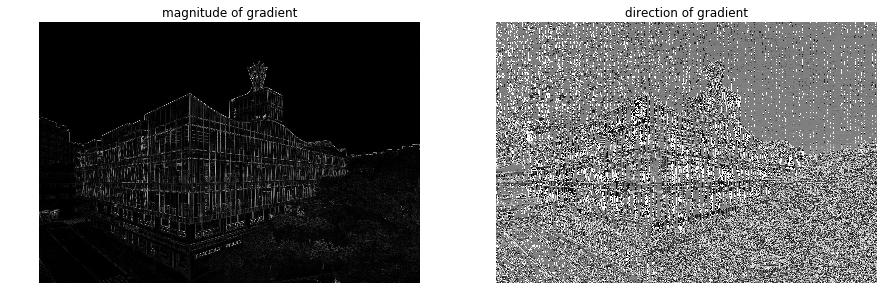

In [23]:
plt.figure(figsize=(15, 15))

p1=plt.subplot(1,2,1)
p1.set_title('magnitude of gradient')
plt.imshow(magnitudes_normed,cmap='gray')
plt.axis('off')

p2=plt.subplot(1,2,2)
p2.set_title('direction of gradient')
plt.imshow(directions_normed,cmap='gray')
plt.axis('off')

plt.show()


# My own kernel:

Sharpening kernel

ker = $\frac{1}{8}\begin{bmatrix}
-1& -1 & -1&-1&-1\\ 
-1 & 2 & 2&2&-1\\ 
-1 & 2 &8 &2&-1 \\
-1 & 2 &2 &2&-1 \\
-1 & -1 &-1 &-1&-1 \end{bmatrix}$

In [24]:
sharp_ker=np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]])/8

# Compute convolution with sharpening kernel  :

In [25]:
# Compute convolution
im_spconv = signal.convolve2d(im_gray, sharp_ker, boundary='symm', mode='same')

# show the result :

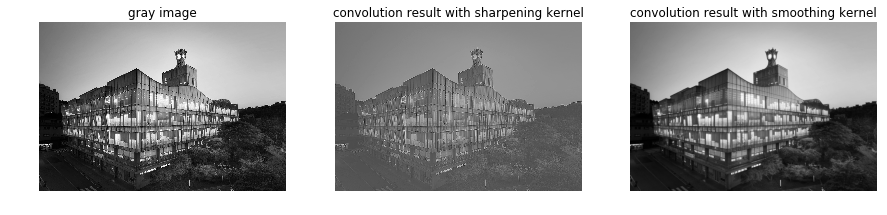

In [26]:
plt.figure(figsize=(15, 15))

p1=plt.subplot(1,3,1)
p1.set_title('gray image')
plt.imshow(im_gray,cmap='gray')
plt.axis('off')

p2=plt.subplot(1,3,2)
p2.set_title('convolution result with sharpening kernel')
plt.imshow(im_spconv,cmap='gray')
plt.axis('off')

p3=plt.subplot(1,3,3)
p3.set_title('convolution result with smoothing kernel')
plt.imshow(im_smconv,cmap='gray')
plt.axis('off')

plt.show()